In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE
import joblib

In [6]:
df = pd.read_csv('churn1.csv', index_col='customerID')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null 

In [ ]:
## valeurs manquantes
df.isna().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


In [ ]:
# Valeurs dupliquées
df.duplicated().sum()

np.int64(22)

In [ ]:
pd.DataFrame({'type' : df.dtypes, 'cardinalité':df.nunique()})

,type,cardinalité
gender,object,2
SeniorCitizen,int64,2
Partner,object,2
Dependents,object,2
tenure,int64,73
PhoneService,object,2
MultipleLines,object,3
InternetService,object,3
OnlineSecurity,object,3
OnlineBackup,object,3


# Nouvelle section

In [ ]:
pd.set_option('display.max_columns', None)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
## Convertir la colonne qui n'est pas dans le bon format

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.isna().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [8]:
# On peut supprimer les lignes où il y a des valeurs manquantes dans la colonne 'TotalCharges' car il en manque que 11
df.dropna(inplace=True)
df.isna().any().sum()

np.int64(0)

<Axes: >

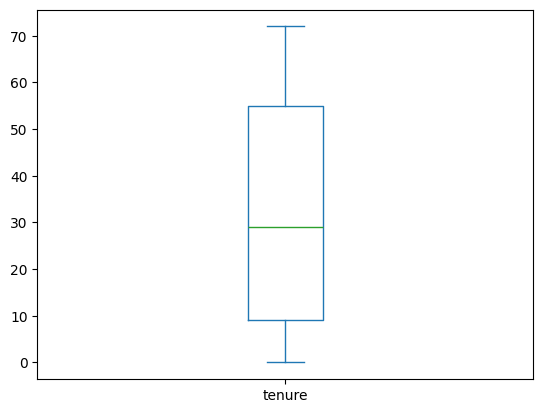

In [ ]:
# Analyse de la variable 'tenure'
df['tenure'].plot.box()

In [ ]:
df['SeniorCitizen'].value_counts()

,count
SeniorCitizen,
0,5890
1,1142


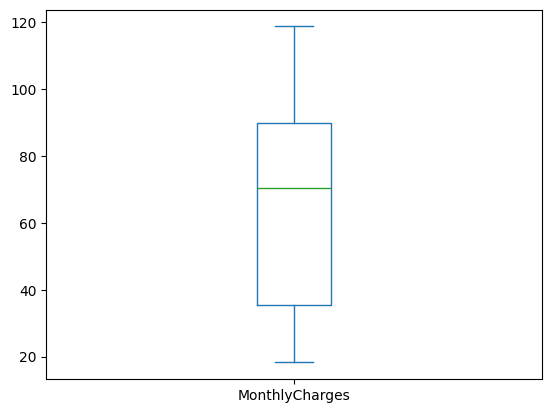

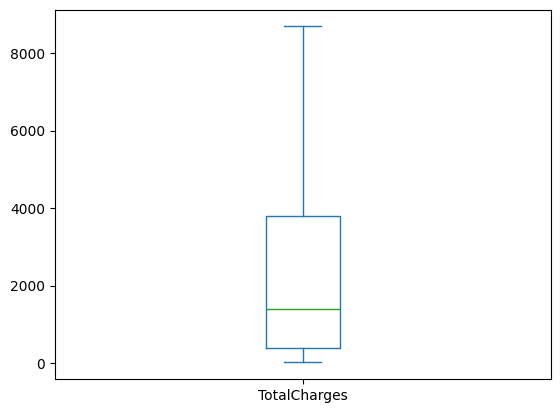

In [ ]:
for col in df.select_dtypes(include='float').columns :
  plt.figure()
  df[col].plot.box()

In [ ]:
## Analyse des variables de type 'object'

for col in df.select_dtypes(include='object').columns:
  print(col, ' : ', df[col].value_counts())
  print( )
  print( )

gender  :  gender
Male      3555
Female    3488
Name: count, dtype: int64


Partner  :  Partner
No     3641
Yes    3402
Name: count, dtype: int64


Dependents  :  Dependents
No     4933
Yes    2110
Name: count, dtype: int64


PhoneService  :  PhoneService
Yes    6361
No      682
Name: count, dtype: int64


MultipleLines  :  MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64


InternetService  :  InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64


OnlineSecurity  :  OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64


OnlineBackup  :  OnlineBackup
No                     3088
Yes                    2429
No internet service    1526
Name: count, dtype: int64


DeviceProtection  :  DeviceProtection
No                     3095
Yes                    2422
No internet service    1526
Name: count, dtype: int

##**Data Visualisation**

<ipython-input-14-85d6334635cd>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn', data=df, palette='deep');


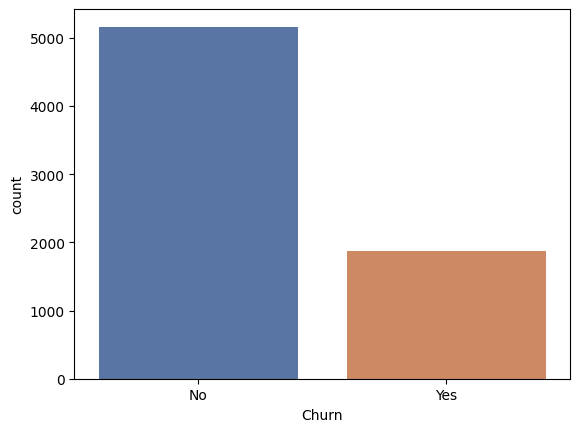

In [ ]:
## Analyse de la variable cible
sns.countplot(x='Churn', data=df, palette='deep');

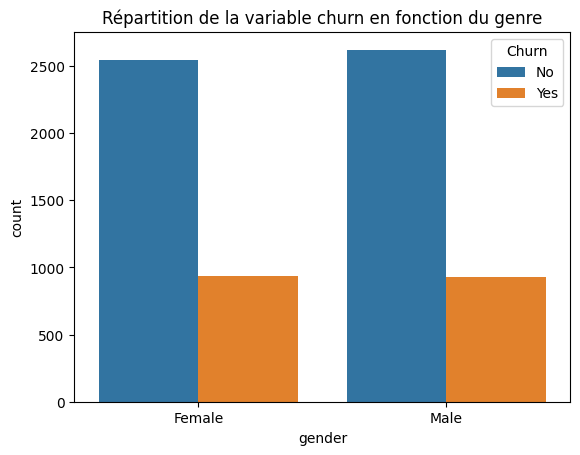

In [ ]:
sns.countplot(x='gender', data=df, hue='Churn')
plt.title('Répartition de la variable churn en fonction du genre');

<ipython-input-94-3ab5d1739c5a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='tenure', data=df, palette='Set2')
<ipython-input-94-3ab5d1739c5a>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='MonthlyCharges', data=df, palette='Set2')
<ipython-input-94-3ab5d1739c5a>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='TotalCharges', data=df, palette='Set2')


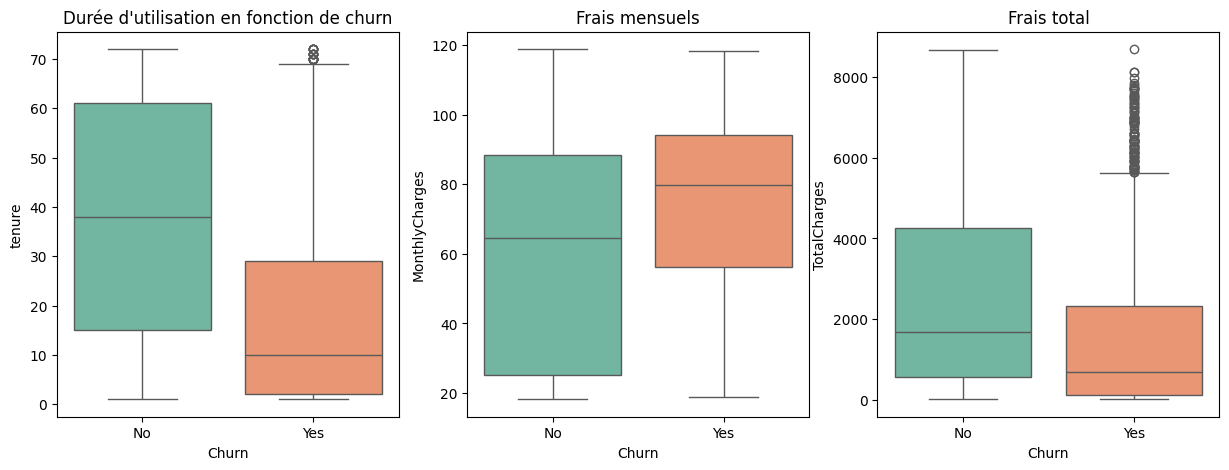

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(131)
sns.boxplot(x='Churn', y='tenure', data=df, palette='Set2')
plt.title("Durée d'utilisation en fonction de churn")

plt.subplot(132)
sns.boxplot(x='Churn', y='MonthlyCharges', data=df, palette='Set2')
plt.title('Frais mensuels')

plt.subplot(133)
sns.boxplot(x='Churn', y='TotalCharges', data=df, palette='Set2')
plt.title('Frais total');

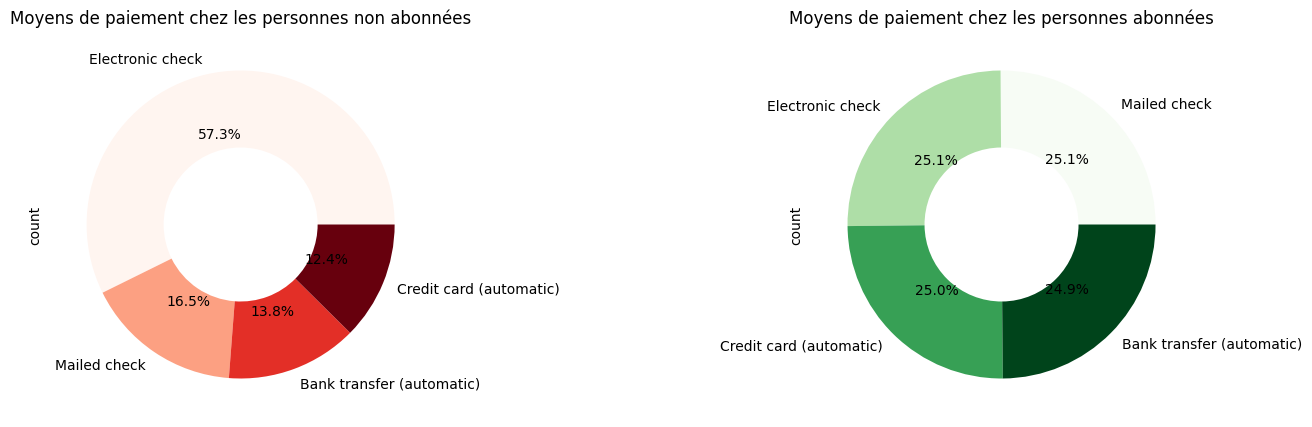

In [ ]:
plt.figure(figsize=(18,5))

colors1 = plt.cm.Reds(np.linspace(0, 1, len(df['PaymentMethod'][df['Churn']=='Yes'].value_counts())))
colors2 = plt.cm.Greens(np.linspace(0, 1, len(df['PaymentMethod'][df['Churn'] == 'No'].value_counts())))

plt.subplot(121)
df['PaymentMethod'][df['Churn']=='Yes'].value_counts().plot.pie(autopct="%1.1f%%", colors=colors1, wedgeprops={'width':0.5})
plt.title('Moyens de paiement chez les personnes non abonnées')

plt.subplot(122)
df['PaymentMethod'][df['Churn']=='No'].value_counts().plot.pie(autopct="%1.1f%%", colors=colors2, wedgeprops={'width':0.5})
plt.title('Moyens de paiement chez les personnes abonnées');


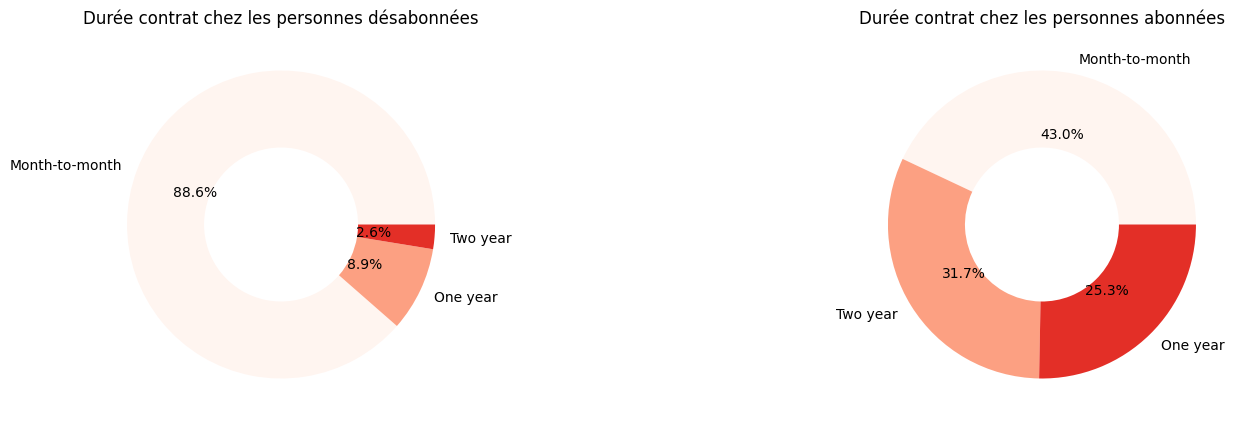

In [ ]:
plt.figure(figsize=(18,5))

plt.subplot(121)
labels = df['Contract'][df['Churn']=='Yes'].value_counts().index
plt.pie(df['Contract'][df['Churn']=='Yes'].value_counts(), autopct='%1.1f%%', wedgeprops={'width':0.5}, colors=colors1, labels=labels )
plt.title('Durée contrat chez les personnes désabonnées')

plt.subplot(122)
labels = df['Contract'][df['Churn']=='No'].value_counts().index
plt.pie(df['Contract'][df['Churn']=='No'].value_counts(), autopct='%1.1f%%', wedgeprops={'width':0.5}, colors=colors1, labels=labels )
plt.title('Durée contrat chez les personnes abonnées');

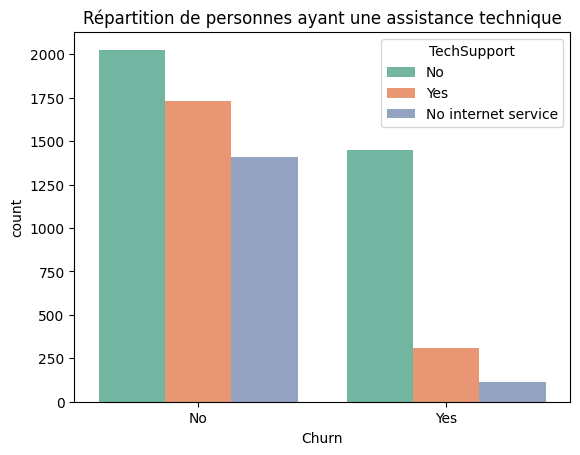

In [ ]:
sns.countplot(hue='TechSupport', x='Churn', data=df, palette="Set2")
plt.title("Répartition de personnes ayant une assistance technique");

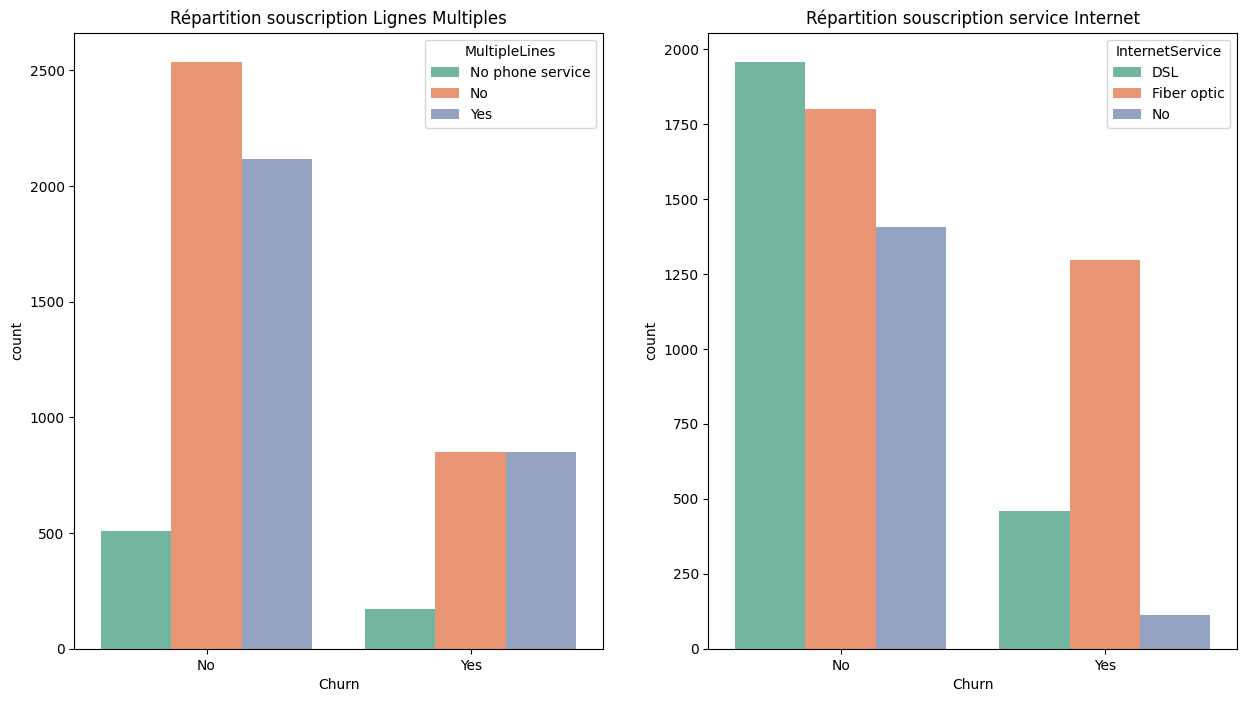

In [ ]:
plt.figure(figsize=(15,8))

plt.subplot(121)
sns.countplot(x='Churn', hue='MultipleLines', data=df, palette="Set2")
plt.title('Répartition souscription Lignes Multiples')

plt.subplot(122)
sns.countplot(x='Churn', hue='InternetService', data=df, palette="Set2")
plt.title('Répartition souscription service Internet');

##**Data Preprocessing**

In [ ]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [9]:
## Sauvegarde du jeu de donnée
df_final = df.copy()

In [10]:
## Encodage des variables
df['Churn'] = df['Churn'].map({'No' : 0, 'Yes' : 1})
df_dummies = pd.get_dummies(df, dtype=int, drop_first=True)

In [ ]:
df_dummies.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
customerID,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,0,1,29.85,29.85,0,0,1,0,0,1,...,0,0,0,0,0,0,1,0,1,0
5575-GNVDE,0,34,56.95,1889.50,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
3668-QPYBK,0,2,53.85,108.15,1,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
7795-CFOCW,0,45,42.30,1840.75,0,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
9237-HQITU,0,2,70.70,151.65,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0


In [ ]:
## Normalisation des données
df_dummies.nunique()

,0
SeniorCitizen,2
tenure,72
MonthlyCharges,1584
TotalCharges,6530
Churn,2
gender_Male,2
Partner_Yes,2
Dependents_Yes,2
PhoneService_Yes,2
MultipleLines_No phone service,2


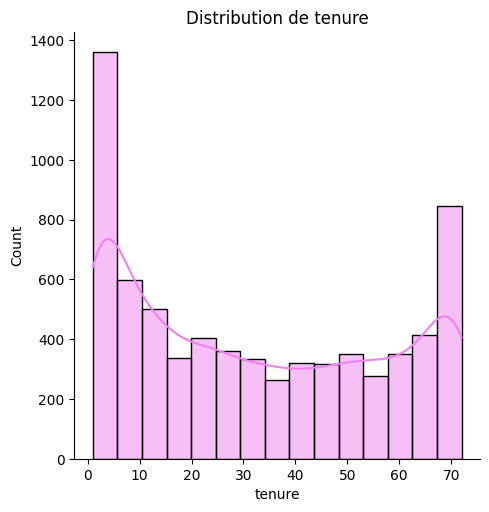

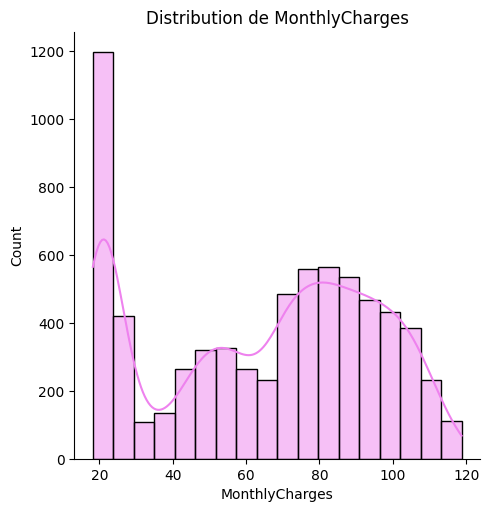

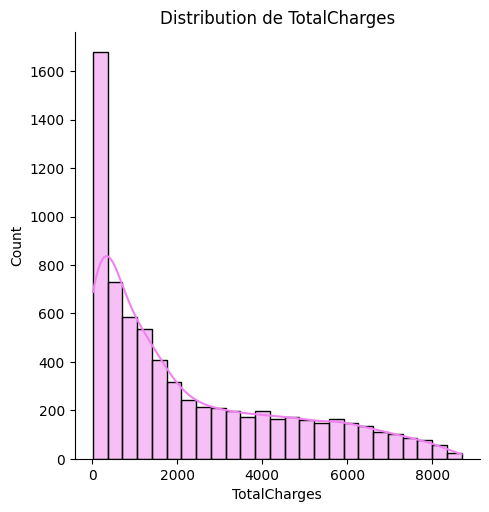

In [ ]:
# Tracer un histogramme des variables continues

def displot(feature, data):
  sns.displot(data[feature], kde=True, edgecolor='black', color='violet')
  plt.title('Distribution de {}'.format(feature))

for feat in ['tenure', 'MonthlyCharges', 'TotalCharges']:
  displot(feat, df_dummies)

In [11]:
## Séparation des données

X = df_dummies.drop('Churn', axis=1)
y = df_dummies['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [12]:
print(X_train.shape)
print(X_test.shape)
print(df_dummies.shape)
print(y_train.value_counts())
print(y_test.value_counts())

(5625, 30)
(1407, 30)
(7032, 31)
Churn
0    4130
1    1495
Name: count, dtype: int64
Churn
0    1033
1     374
Name: count, dtype: int64


In [13]:
## Normalisation des données

scaler = StandardScaler()

X_train[['tenure', 'MonthlyCharges', 'TotalCharges']] = scaler.fit_transform(X_train[['tenure', 'MonthlyCharges', 'TotalCharges']])
X_test[['tenure', 'MonthlyCharges', 'TotalCharges']] = scaler.transform(X_test[['tenure', 'MonthlyCharges', 'TotalCharges']])


In [14]:
display(X_train[['tenure', 'MonthlyCharges', 'TotalCharges']].min())
display(X_train[['tenure', 'MonthlyCharges', 'TotalCharges']].max())

tenure           -1.277169
MonthlyCharges   -1.539459
TotalCharges     -0.996277
dtype: float64

tenure            1.616661
MonthlyCharges    1.791525
TotalCharges      2.829949
dtype: float64

In [ ]:
## Tester plusieurs modèles par validation croisée

models = []

models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('svc', SVC()))
models.append(('DTC', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))

In [ ]:
resultats = []
noms_modeles = []

for nom, modele in models:
  resultat = cross_val_score(modele, X_train, y_train, cv=10, scoring='accuracy')
  resultats.append(resultat)
  noms_modeles.append(nom)

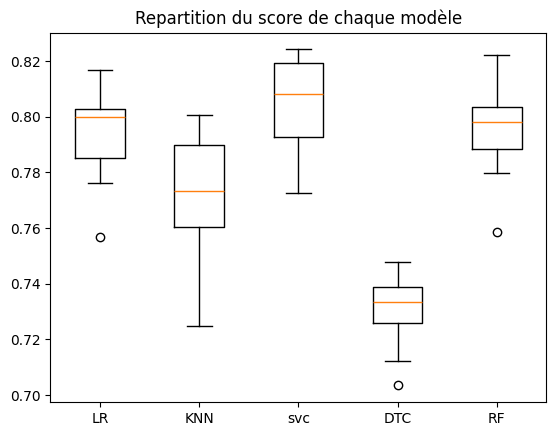

In [ ]:
plt.boxplot(resultats)
plt.xticks(range(1, len(noms_modeles)+1), noms_modeles)
plt.title('Repartition du score de chaque modèle');

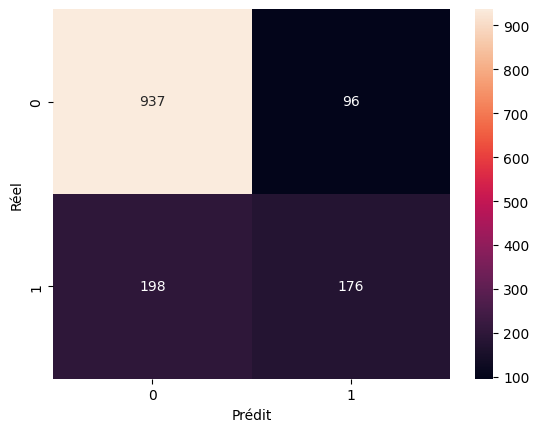

In [ ]:
## Résultat du meilleur modèle

clf = SVC()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
sns.heatmap((confusion_matrix(y_test, y_pred)), annot=True, fmt='d')
plt.xlabel('Prédit')
plt.ylabel('Réel');

In [ ]:
## Evaluation de la performance du modèle

print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.91      0.83      0.86      1135
           1       0.47      0.65      0.54       272

    accuracy                           0.79      1407
   macro avg       0.69      0.74      0.70      1407
weighted avg       0.82      0.79      0.80      1407



In [ ]:
## Optimisation du modèle

model = SVC()

params = {'C': [0.1, 100], 'kernel': ['linear', 'rbf'], 'gamma': [1, 10]}

grille = GridSearchCV(model, params, cv=5, scoring='accuracy')

grille.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 100], 'gamma': [1, 10],
                         'kernel': ['linear', 'rbf']},
             scoring='accuracy')

In [ ]:
## Afficher le meiller socre et les meileurs paramètres
print(grille.best_score_)
print('Meilleur paramètres : ', grille.best_params_)

## Prédiction
y_pred_optimized = grille.best_estimator_.predict(X_test)

0.8014222222222223
Meilleur paramètres :  {'C': 0.1, 'gamma': 1, 'kernel': 'linear'}


<Axes: >

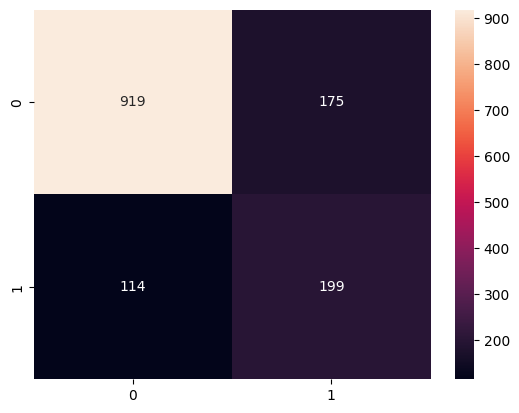

In [ ]:
## Matrice de confusion
sns.heatmap(confusion_matrix(y_pred_optimized, y_test), annot=True, fmt='d')

In [ ]:
# Evaluation du modèle

print(classification_report(y_pred_optimized, y_test))

              precision    recall  f1-score   support

           0       0.89      0.84      0.86      1094
           1       0.53      0.64      0.58       313

    accuracy                           0.79      1407
   macro avg       0.71      0.74      0.72      1407
weighted avg       0.81      0.79      0.80      1407



In [ ]:
## Vérifier s'il y a eu sur-apprentissage
# Évaluation de la performance sur l'ensemble d'entraînement
train_score = grille.best_estimator_.score(X_train, y_train)
print(f"Performance sur l'ensemble d'entraînement : {train_score}")

# Évaluation de la performance sur l'ensemble de test
test_score = grille.best_estimator_.score(X_test, y_test)
print(f"Performance sur l'ensemble de test : {test_score}")


Performance sur l'ensemble d'entraînement : 0.8024888888888889
Performance sur l'ensemble de test : 0.7945984363894811


Ajuster le seuil de probabilité

In [15]:
svc = SVC(probability=True)
svc.fit(X_train, y_train)

# Ajuster le seuil manuellement
y_proba = svc.predict_proba(X_test)[:, 1]
threshold = 0.3
y_pred_threshold = (y_proba >= threshold).astype(int)

print(classification_report(y_test, y_pred_threshold))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85      1033
           1       0.59      0.57      0.58       374

    accuracy                           0.78      1407
   macro avg       0.72      0.71      0.71      1407
weighted avg       0.78      0.78      0.78      1407



Utiliser SMOTE pour équilibrer les classes

In [ ]:
# Rééchantillonnage des données d'entraînement
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Réentraînement du modèle sur les données équilibrées
model = SVC()
model.fit(X_resampled, y_resampled)

# Prédictions sur les données de test
y_pred_resampled = model.predict(X_test)

# Évaluation
print(classification_report(y_test, y_pred_resampled))

              precision    recall  f1-score   support

           0       0.88      0.76      0.82      1033
           1       0.52      0.72      0.60       374

    accuracy                           0.75      1407
   macro avg       0.70      0.74      0.71      1407
weighted avg       0.78      0.75      0.76      1407



<Axes: >

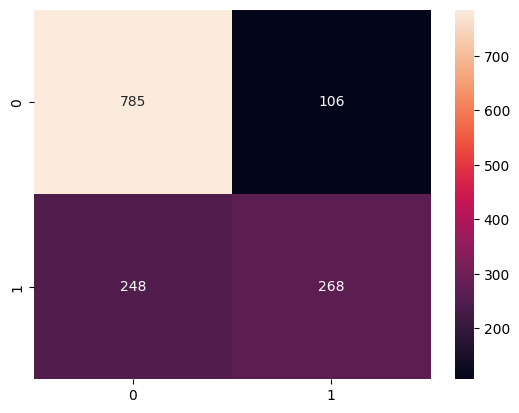

In [18]:
## Matrice de confusion
sns.heatmap(confusion_matrix(y_pred_resampled, y_test), annot=True, fmt='d')